In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy.ndimage import rotate
import cv2
from PIL import Image

Phase retrieval-Extended Paganin

In [2]:
name="Artificial blood"
Name="1.94 mm"
namme="PMMA2"
name0 = "Tubos "+namme+"\Tubo "+Name+"\RAW_"+name
name1 = name0+"\RAW1.txt"
name2 = "Tubos "+namme+"\FF\FF_"
name3 = name0+"\RAWSM.txt"
a=5.5*(10**(-5))
Npixeles=256
E=15*(10**(3))
E_J=E*1.6*(10**(-19))
h=6.63*10**(-34)
c=3*(10**(8))
k=(2*np.pi*E_J)/(h*c)
z=1.2
zs=0.6
M=(z+zs)/zs
#M=1
nArchivosFF=20
u=1
delta_m1=1.19E-06 #PMMA
beta_m1=8.56E-10
#delta_muestra=1.20E-09 #Air
#beta_muestra=1.37E-12
#delta_muestra=8.36E-07 #Iodine
#beta_muestra=2.79E-09
delta_muestra=1.08E-06 #Blood
beta_muestra=1.21E-09
#delta_m1=1.06E-06 #Aorta
#beta_m1=1.19E-09
#delta_muestra=2.95E-06 #HA
#beta_muestra=3.06E-08
delta_rel=(delta_muestra-delta_m1) 
beta_rel=(beta_muestra-beta_m1)
s=0.4
#s=0
N=0
NN=255
MMM=7
MMMM=250
x=np.arange(0,Npixeles,30)
xx=np.arange(0,Npixeles,1)
x_mm = np.multiply(xx,np.round((a*(10**(3)))/M,4))
x_J = np.multiply(x,np.round((a*(10**(3)))/M,4))
labels=x_J.tolist()

In [3]:
def Raws(name, u):
    RAW = np.rot90(np.genfromtxt(name),u)
    s = np.zeros((len(RAW),len(RAW[0])))
    for i in range(len(RAW)):
        for j in range(len(RAW)):
            if np.isnan(RAW[i,j]):
                RAW[i,j] = 0.0
    for i in range(len(RAW)):
        for j in range(len(RAW[0])):
            if RAW[i,j] == 0.0:
                a = i
                b = j
                c = 0
                suma = 0
                borde = 0
                for k in range(a-1, a+2):
                    for n in range(b-1, b+2):   
                        try:
                            suma += RAW[k,n]
                            if RAW[k,n] == 0.0:
                                c = c + 1
                        except:
                            borde = 1

                if borde == 0:
                    RAW[i,j] = suma/(9-c)
                else:
                    RAW[i,j] = suma/(6-c)
    return RAW

In [4]:
def FF(name, numArchivos,u):
    FF=[]
    for j in range(numArchivos):
        if j<10:
            FF.append(np.genfromtxt("{}0{}".format(name,j)))
        if j>=10 and j<numArchivos:
            FF.append(np.genfromtxt("{}{}".format(name,j)))
    FFmean=np.zeros((len(FF[0]), len(FF[0])))
    for j in range(len(FF)):
        FFmean=FFmean+FF[j]
    FFmean=np.rot90(FFmean,u)
    s = np.zeros((len(FFmean),len(FFmean[0])))
    for i in range(len(FFmean)):
        for j in range(len(FFmean)):
            if np.isnan(FFmean[i,j]):
                FFmean[i,j] = 0.0
    for i in range(len(FFmean)):
        for j in range(len(FFmean[0])):
            if FFmean[i,j] == 0.0:
                a = i
                b = j
                c = 0
                suma = 0
                borde = 0
                for k in range(a-1, a+2):
                    for n in range(b-1, b+2):   
                        try:
                            suma += FFmean[k,n]
                            if FFmean[k,n] == 0.0:
                                c = c + 1
                        except:
                            borde = 1

                if borde == 0:
                    FFmean[i,j] = suma/(9-c)
                else:
                    FFmean[i,j] = suma/(6-c)
    return FFmean

In [5]:
def Esp(name, a, delta, beta, E, z, M, k, ss):
    frr = np.fft.fftshift(np.fft.fft2(name))  
    Npixeles = len(name)
    u=np.fft.fftshift(np.fft.fftfreq(Npixeles, a))
    v=np.fft.fftshift(np.fft.fftfreq(Npixeles, a))
    uu, vv = np.meshgrid(u, v)
    freq_matrix = (4*(np.pi**2))*(uu**2 + vv**2)
    freq_matrixx=-(2/(a**2))*(np.cos(2*np.pi*a*uu)+np.cos(2*np.pi*a*vv)-2)
    W=(delta*z)/(2*beta*k*M) 
    AA=np.ones((Npixeles,Npixeles)) 
    Q=AA+W*freq_matrixx
    QQ=(Q)/(Q**2+ss)
    A=QQ*frr
    img_back = np.fft.ifft2(np.fft.ifftshift(A)).real 
    A1=np.log(img_back)
    return A1

In [6]:
def PI(name,inicial,final,h,y):
    P=np.zeros(y-h)
    for i in range(inicial,final):
        P=P+name[i,h:y]
    mean=P/(final-inicial)
    return mean

In [7]:
RAW=Raws(name1,u)
FFF=FF(name2, nArchivosFF,u)
RAWC=RAW/FFF #Se corrige la imagen RAW con FFF
#RAWCN= np.genfromtxt(name1)
RAWS= np.rot90(np.genfromtxt(name3),u) #Se llama la imagen simulada.
#RAWSN= np.genfromtxt(name3)
#rotated= rotate(RAWC,135)

In [8]:
RAWCN=RAWC/(np.mean(np.concatenate((RAWC[N:NN,0:MMM],RAWC[N:NN,MMMM:256]),1)))
RAWSN=RAWS/(np.mean(np.concatenate((RAWS[N:NN,0:MMM],RAWS[N:NN,MMMM:256]),1)))

In [9]:
Y3=0
Y4=255
PIRAWCN=PI(RAWCN,Y3,Y4,0,Npixeles)
PIRAWSN=PI(RAWSN,Y3,Y4,0,Npixeles)

In [10]:
X=7
RAWCNN=np.concatenate((RAWCN[:,X:256],RAWCN[:,0:X]),1)
PIRAWCC=np.concatenate((PIRAWCN[X:256],PIRAWCN[0:X]))

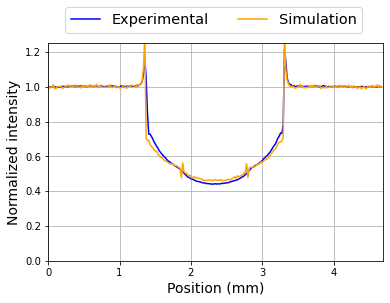

In [11]:
fig,ax=plt.subplots()
plt.plot(x_mm,PIRAWCC,label="Experimental", color="blue")
plt.plot(x_mm,PIRAWSN,label="Simulation", color="orange")
#plt.axhline(y=0.54, xmin=0, xmax=255,linestyle="-", color="black",linewidth=0.9)
#plt.axhline(y=0.35, xmin=0, xmax=255,linestyle="--", color="blue",linewidth=0.9)
#plt.axhline(y=0.64, xmin=0, xmax=255,linestyle="--", color="orange",linewidth=0.9)
#plt.title("Intensity profiles of "+ Name+ " external diameter\n"+name,fontsize=15)
plt.ylabel("Normalized intensity",fontsize=14)
plt.xlabel("Position (mm)",fontsize=14)
plt.grid()
plt.ylim(0.0,1.25)
plt.xlim(0.0,np.round((Npixeles*a*(10**(3)))/M,3))
plt.legend(bbox_to_anchor=(0.96, 1.2),mode = "Expand", ncol=3,fontsize=14.5)
#plt.savefig(name0+"\DataPM\ComparisonAbsorption_"+name+".pdf", bbox_inches='tight', transparent=True, pad_inches=0,dpi=199)

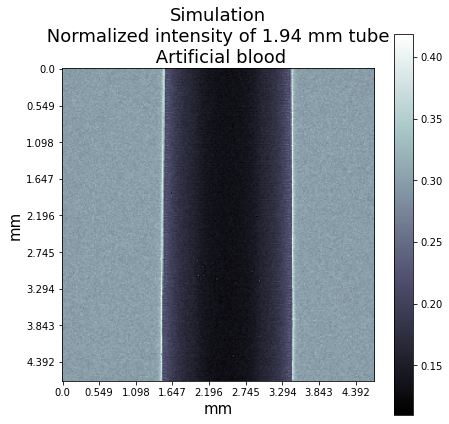

In [12]:
plt.figure(figsize=(7,7))
plt.imshow(RAWC[:,:], cmap="bone")
plt.title("Simulation\n Normalized intensity of "+Name+" tube \n "+name, fontsize=18)
plt.ylabel("mm",fontsize=15)
plt.xlabel("mm",fontsize=15)
plt.xticks(x,labels)
plt.yticks(x,labels)
plt.colorbar()

In [13]:
M_RAWCC=Esp((M**2)*RAWCNN, a, delta_rel, beta_rel, E, z, M, k, s)
M_RAWC=M_RAWCC-np.mean(np.concatenate((M_RAWCC[N:NN,0:MMM],M_RAWCC[N:NN,MMMM:256]),1))
M_RAWSS=Esp((M**2)*RAWSN, a, delta_rel, beta_rel, E, z, M, k, s)
M_RAWS=M_RAWSS-np.mean(np.concatenate((M_RAWSS[N:NN,0:MMM],M_RAWSS[N:NN,MMMM:256]),1))

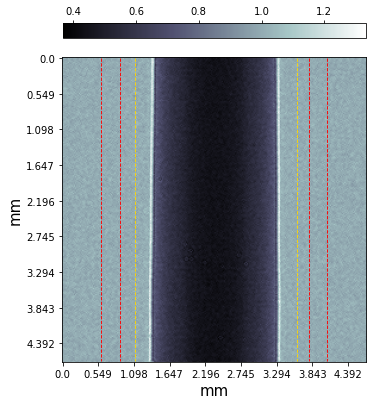

In [14]:
#XXX1=80 #Air
#X2=97
#X3=107
#X4=148
#X5=158
#XXX6=175
#XXX1=83 #Iodine
#X2=100
#X3=110
#X4=147
#X5=157
#XXX6=172
XXX1=32 #Blood
X2=48
X3=61
X4=197
X5=207
XXX6=222
#XXX1=24 #BloodPlaca
#X2=41
#X3=50
#X4=70
#X5=217
#XXX6=237
Y1=0
Y2=255
fig, ax = plt.subplots(figsize=(7, 7))
u=ax.imshow(np.exp(M_RAWC[:,:]), cmap="bone")
ax.vlines(x=XXX1, ymin=Y1, ymax=Y2,linestyle="--", color="red",linewidth=0.9)
ax.vlines(x=X2, ymin=Y1, ymax=Y2,linestyle="--", color="red",linewidth=0.9)
ax.vlines(x=X3, ymin=Y3, ymax=Y4,linestyle="--", color="gold",linewidth=0.9)
ax.vlines(x=X4, ymin=Y3, ymax=Y4,linestyle="--", color="gold",linewidth=0.9)
#ax.hlines(y=Y3, xmin=X3, xmax=X4,linestyle="--", color="gold",linewidth=0.9)
#ax.hlines(y=Y4, xmin=X3, xmax=X4,linestyle="--", color="gold",linewidth=0.9)
ax.vlines(x=X5, ymin=Y1, ymax=Y2,linestyle="--", color="red",linewidth=0.9)
ax.vlines(x=XXX6, ymin=Y1, ymax=Y2,linestyle="--", color="red",linewidth=0.9)
plt.ylabel("mm",fontsize=15)
plt.xlabel("mm",fontsize=15)
plt.xticks(x,labels)
plt.yticks(x,labels)
fig.colorbar(u,ax=ax,location='top', anchor=(0.5, 0), shrink=0.775)

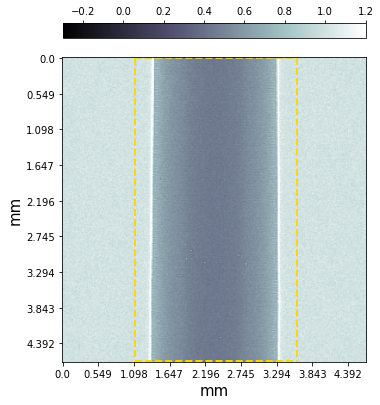

In [15]:
fig, ax = plt.subplots(figsize=(7, 7))
u=ax.imshow(RAWCNN, cmap="bone",vmin=-0.3,vmax=1.2)
ax.vlines(x=X3, ymin=Y3, ymax=Y4,linestyle="--", color="gold",linewidth=1.9)
ax.vlines(x=X4, ymin=Y3, ymax=Y4,linestyle="--", color="gold",linewidth=1.9)
ax.hlines(y=Y3, xmin=X3, xmax=X4,linestyle="--", color="gold",linewidth=1.9)
ax.hlines(y=Y4, xmin=X3, xmax=X4,linestyle="--", color="gold",linewidth=1.9)
plt.ylabel("mm",fontsize=15)
plt.xlabel("mm",fontsize=15)
plt.xticks(x,labels)
plt.yticks(x,labels)
fig.colorbar(u,ax=ax,location='top', anchor=(0.5, 0), shrink=0.775)
#fig.savefig(name0+"\DataPM\AttSCNR_"+name+".pdf", bbox_inches='tight', transparent=True, pad_inches=0,dpi=199)

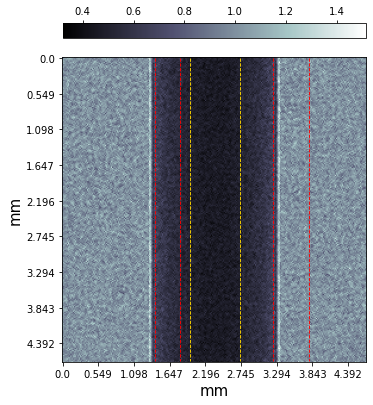

In [16]:
XXXX1=78 #Diameter 1
XX2=99
XX3=107
XX4=149
XX5=157
XXXX6=177
#XXXX1=55 #Diameter 2
#XX2=72
#XX3=82
#XX4=173
#XX5=183
#XXXX6=200
#XXXX1=30 #Diameter 3
#XX2=46
#XX3=55
#XX4=199
#XX5=210
#XXXX6=226
fig, ax = plt.subplots(figsize=(7, 7))
u=ax.imshow(np.exp(M_RAWS[:,:]), cmap="bone")
#plt.title("Experimental\n Absorption of "+Name+" tube \n "+name, fontsize=18)
ax.vlines(x=XXXX1, ymin=Y1, ymax=Y2,linestyle="--", color="red",linewidth=0.9)
ax.vlines(x=XX2, ymin=Y1, ymax=Y2,linestyle="--", color="red",linewidth=0.9)
ax.vlines(x=XX3, ymin=Y3, ymax=Y4,linestyle="--", color="gold",linewidth=0.9)
ax.vlines(x=XX4, ymin=Y3, ymax=Y4,linestyle="--", color="gold",linewidth=0.9)
#ax.hlines(y=Y3, xmin=XX3, xmax=XX4,linestyle="--", color="gold",linewidth=0.9)
#ax.hlines(y=Y4, xmin=XX3, xmax=XX4,linestyle="--", color="gold",linewidth=0.9)
ax.vlines(x=X5, ymin=Y1, ymax=Y2,linestyle="--", color="red",linewidth=0.9)
ax.vlines(x=XXXX6, ymin=Y1, ymax=Y2,linestyle="--", color="red",linewidth=0.9)
plt.ylabel("mm",fontsize=15)
plt.xlabel("mm",fontsize=15)
plt.xticks(x,labels)
plt.yticks(x,labels)
fig.colorbar(u,ax=ax,location='top', anchor=(0.5, 0), shrink=0.775)

In [17]:
PIMRAWC=PI(np.exp(M_RAWC[:,:]),Y3,Y4,0,Npixeles)
PIMRAWS=PI(np.exp(M_RAWS[:,:]),Y3,Y4,0,Npixeles)

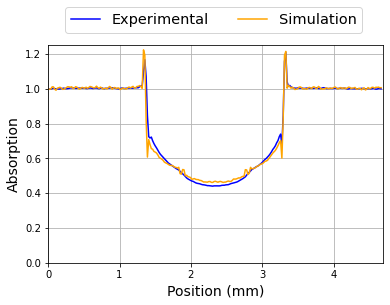

In [18]:
fig,ax=plt.subplots()
plt.plot(x_mm,PIMRAWC,label="Experimental", color="blue")
plt.plot(x_mm,PIMRAWS,label="Simulation", color="orange")
#plt.title("Absorption profiles of "+ Name+ " \n"+name,fontsize=15)
plt.ylabel("Absorption",fontsize=14)
plt.xlabel("Position (mm)",fontsize=14)
plt.grid()
plt.ylim(0.0,1.25)
plt.xlim(0.0,np.round((Npixeles*a*(10**(3)))/M,3))
plt.legend(bbox_to_anchor=(0.96, 1.21),mode = "Expand", ncol=3,fontsize=14.5)
#plt.savefig(name0+"\DataPM\ComparisonAbsorption_"+name+".pdf", bbox_inches='tight', transparent=True, pad_inches=0,dpi=199)

In [19]:
PhasePCC=-(delta_rel/(2*beta_rel))*M_RAWCC
PhasePC=PhasePCC/(np.mean(np.concatenate((PhasePCC[N:NN,0:MMM],PhasePCC[N:NN,MMMM:256]),1)))
PhasePSS=-(delta_rel/(2*beta_rel))*M_RAWSS
PhasePS=PhasePSS/(np.mean(np.concatenate((PhasePSS[N:NN,0:MMM],PhasePSS[N:NN,MMMM:256]),1)))

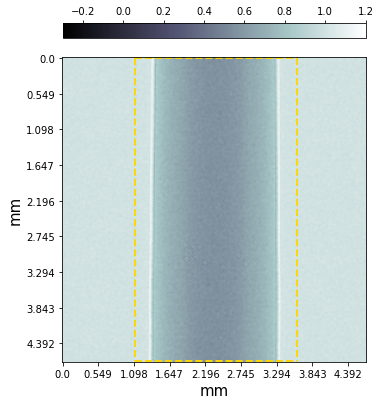

In [20]:
fig, ax = plt.subplots(figsize=(7, 7))
u=ax.imshow(PhasePC, cmap="bone",vmin=-0.3,vmax=1.2)
#ax.vlines(x=XXX1, ymin=Y1, ymax=Y2,linestyle="--", color="red",linewidth=1.9)
#ax.vlines(x=X2, ymin=Y1, ymax=Y2,linestyle="--", color="red",linewidth=1.9)
ax.vlines(x=X3, ymin=Y3, ymax=Y4,linestyle="--", color="gold",linewidth=1.9)
ax.vlines(x=X4, ymin=Y3, ymax=Y4,linestyle="--", color="gold",linewidth=1.9)
ax.hlines(y=Y3, xmin=X3, xmax=X4,linestyle="--", color="gold",linewidth=1.9)
ax.hlines(y=Y4, xmin=X3, xmax=X4,linestyle="--", color="gold",linewidth=1.9)
#ax.vlines(x=X5, ymin=Y1, ymax=Y2,linestyle="--", color="red",linewidth=1.9)
#ax.vlines(x=XXX6, ymin=Y1, ymax=Y2,linestyle="--", color="red",linewidth=1.9)
plt.ylabel("mm",fontsize=15)
plt.xlabel("mm",fontsize=15)
plt.xticks(x,labels)
plt.yticks(x,labels)
fig.colorbar(u,ax=ax,location='top', anchor=(0.5, 0), shrink=0.775)
#fig.savefig(name0+"\DataPM\PhaseSCNR_"+name+".pdf", bbox_inches='tight', transparent=True, pad_inches=0,dpi=199)

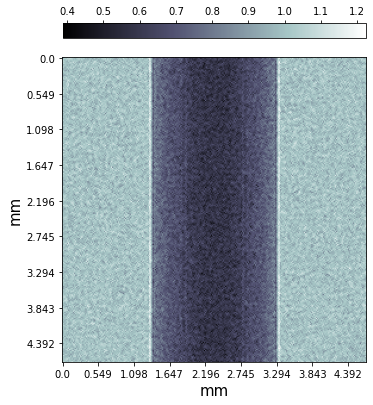

In [21]:
fig, ax = plt.subplots(figsize=(7, 7))
u=ax.imshow(PhasePS, cmap="bone")
plt.ylabel("mm",fontsize=15)
plt.xlabel("mm",fontsize=15)
plt.xticks(x,labels)
plt.yticks(x,labels)
fig.colorbar(u,ax=ax,location='top', anchor=(0.5, 0), shrink=0.775)

In [22]:
PIPC=PI(PhasePC,Y3,Y4,0,Npixeles)
PIPS=PI(PhasePS,Y3,Y4,0,Npixeles)

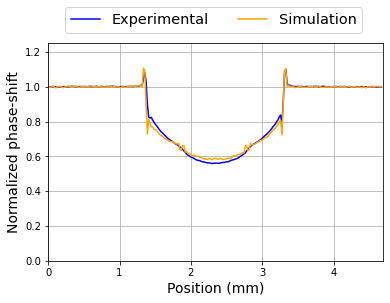

In [23]:
fig,ax=plt.subplots()
plt.plot(x_mm,PIPC,label="Experimental", color="blue")
plt.plot(x_mm,PIPS,label="Simulation", color="orange")
plt.ylabel("Normalized phase-shift",fontsize=14)
plt.xlabel("Position (mm)",fontsize=14)
plt.grid()
plt.ylim(0.0,1.25)
plt.xlim(0.0,np.round((Npixeles*a*(10**(3)))/M,3))
plt.legend(bbox_to_anchor=(0.96, 1.2),mode = "Expand", ncol=3,fontsize=14.5)
#plt.savefig(name0+"\DataPM\ComparisonPhase_"+name+".pdf", bbox_inches='tight', transparent=True, pad_inches=0,dpi=199)

In [24]:
meanB=np.mean(np.concatenate((RAWCNN[Y1:Y2,XXX1:X2],RAWCNN[Y1:Y2,X5:XXX6]),1))
meanS=np.mean(RAWCNN[Y3:Y4,X3:X4])
destB=np.std(np.concatenate((RAWCNN[Y1:Y2,XXX1:X2],RAWCNN[Y1:Y2,X5:XXX6]),1))
destS=np.std(RAWCNN[Y3:Y4,X3:X4])
CNR1=(np.abs(meanB-meanS))/np.sqrt(destB**2+destS**2)
CNR2=(np.abs(meanB-meanS))/destB
print("Experimental RAW image/The meanB is",np.round(meanB,3))
print("Experimental RAW image/The meanS is",np.round(meanS,3))
print("Experimental RAW image/The desB is",np.round(destB,3))
print("Experimental RAW image/The desS is",np.round(destS,3))
#print("Experimental RAW image/The CNR1 is", np.round(CNR1,3))
print("Experimental RAW image/The CNR2 is", np.round(CNR2,3))

Experimental RAW image/The meanB is 1.003
Experimental RAW image/The meanS is 0.653
Experimental RAW image/The desB is 0.027
Experimental RAW image/The desS is 0.226
Experimental RAW image/The CNR2 is 13.016


In [25]:
SmeanB=np.mean(np.concatenate((RAWSN[:,XXXX1:XX2],RAWSN[:,XX5:XXXX6]),1))
SmeanS=np.mean(RAWSN[Y1:Y2,XX3:XX4])
SdestB=np.std(np.concatenate((RAWSN[:,XXXX1:XX2],RAWSN[:,XX5:XXXX6]),1))
SdestS=np.std(RAWSN[Y1:Y2,XX3:XX4])
SCNR1=(np.abs(SmeanB-SmeanS))/np.sqrt(SdestB**2+SdestS**2)
SCNR2=(np.abs(SmeanB-SmeanS))/SdestB
print("Simulation RAW image/The meanB is",np.round(SmeanB,3))
print("Simulation RAW image/The meanS is",np.round(SmeanS,3))
print("Simulation RAW image/The desB is",np.round(SdestB,3))
print("Simulation RAW image/The desS is",np.round(SdestS,3))
#print("Simulation RAW image/The CNR1 is", np.round(SCNR1,3))
print("Simulation RAW image/The CNR2 is", np.round(SCNR2,3))

Simulation RAW image/The meanB is 0.592
Simulation RAW image/The meanS is 0.472
Simulation RAW image/The desB is 0.071
Simulation RAW image/The desS is 0.048
Simulation RAW image/The CNR2 is 1.701


In [26]:
meanBP=np.mean(np.concatenate((PhasePC[Y1:Y2,XXX1:X2],PhasePC[Y1:Y2,X5:XXX6]),1))
meanSP=np.mean(PhasePC[Y3:Y4,X3:X4])
destBP=np.std(np.concatenate((PhasePC[Y1:Y2,XXX1:X2],PhasePC[Y1:Y2,X5:XXX6]),1))
destSP=np.std(PhasePC[Y3:Y4,X3:X4])
CNRP1=(np.abs(meanBP-meanSP))/np.sqrt(destBP**2+destSP**2)
CNRP2=(np.abs(meanBP-meanSP))/destBP
print("Experimental phase image/The meanB is",np.round(meanBP,3))
print("Experimental phase image/The meanS is",np.round(meanSP,3))
print("Experimental phase image/The desB is",np.round(destBP,3))
print("Experimental phase image/The desS is",np.round(destSP,3))
#print("Experimental phase image/The CNR1 is", np.round(CNRP1,3))
print("Experimental phase image/The CNR2 is", np.round(CNRP2,3))

Experimental phase image/The meanB is 1.002
Experimental phase image/The meanS is 0.743
Experimental phase image/The desB is 0.012
Experimental phase image/The desS is 0.169
Experimental phase image/The CNR2 is 20.875


In [27]:
SmeanBP=np.mean(np.concatenate((PhasePS[:,XXXX1:XX2],PhasePS[:,XX5:XXXX6]),1))
SmeanSP=np.mean(PhasePS[Y3:Y4,XX3:XX4])
SdestBP=np.std(np.concatenate((PhasePS[:,XXXX1:XX2],PhasePS[:,XX5:XXXX6]),1))
SdestSP=np.std(PhasePS[Y3:Y4,XX3:XX4])
SCNRP1=(np.abs(SmeanBP-SmeanSP))/np.sqrt(SdestBP**2+SdestSP**2)
SCNRP2=(np.abs(SmeanBP-SmeanSP))/SdestBP
print("Simulation phase image/The meanB is",np.round(SmeanBP,3))
print("Simulation phase image/The meanS is",np.round(SmeanSP,3))
print("Simulation phase image/The desB is",np.round(SdestBP,3))
print("Simulation phase image/The desS is",np.round(SdestSP,3))
#print("Simulation phase image/The CNR1 is", np.round(SCNRP1,3))
print("Simulation phase image/The CNR2 is", np.round(SCNRP2,3))

Simulation phase image/The meanB is 0.717
Simulation phase image/The meanS is 0.595
Simulation phase image/The desB is 0.058
Simulation phase image/The desS is 0.048
Simulation phase image/The CNR2 is 2.09


In [28]:
#np.savetxt(name0+"\DataPM\ImCI_"+Name+".txt",RAWCNN)
#np.savetxt(name0+"\DataPM\PICFC_"+Name+".txt",PIRAWCC)
##np.savetxt(name0+"\DataPM\ImCFS_"+Name+".txt",RAWSN)
#np.savetxt(name0+"\DataPM\PICFS_"+Name+".txt",PIRAWSN)

#np.savetxt(name0+"\DataPM\ImPI_"+Name+".txt",PhasePC)
#np.savetxt(name0+"\DataPM\PIFC_"+Name+".txt",PIPC)
#np.savetxt(name0+"\DataPM\ImFS_"+Name+".txt",PhasePS)
#np.savetxt(name0+"\DataPM\PIFS_"+Name+".txt",PIPS)

In [29]:
#rc.savefig(name0+"\Data\RAW_"+name+".tiff", bbox_inches='tight', transparent=True, pad_inches=0)
#rcN.savefig(name0+"\Data\RAWN_"+name+".tiff", bbox_inches='tight', transparent=True, pad_inches=0)
#imagPE.savefig(name0+"\Data\PhaseE_"+name+".png", bbox_inches='tight', transparent=True, pad_inches=0)
#imagAE.savefig(name0+"\Data\AttE_"+name+".png", bbox_inches='tight', transparent=True, pad_inches=0)

In [30]:
#foo=Image.open(name0+"\Data\RAWN_"+name+".tiff")
#foo=foo.resize((256,256),Image.ANTIALIAS)
#foo.save(name0+"\Data\RAWN_"+name+".tiff",optimize=True,quality=95)